In [1]:
import sympy as sp
sp.init_printing()

In [18]:
from scipy.integrate import quad

In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [3]:
x, mu =sp.symbols("x mu")

In [5]:
def gauss_pdf(x, mu, sigma):
    return 1/sp.sqrt(2 * sp.pi * sigma**2) * sp.exp(-(x - mu)**2 / (2 * sigma**2))

In [6]:
q = gauss_pdf(x, mu, 1)

In [7]:
q

In [62]:
p = 1/2 * gauss_pdf(x, -2, 1) + 1/2 * gauss_pdf(x, 2, 1)

In [9]:
p

In [10]:
p.evalf(10, {x:np.linspace(-2, 3, 200)})

In [11]:
sp.integrate(q, x, )

In [12]:
sp.integrate(q, (x, -sp.oo, sp.oo), ).simplify()

In [16]:
#sp.integrate( p * sp.log(p/q), (x, -sp.oo, sp.oo))

In [14]:
sp.__version__

'1.2'

In [47]:
def KL_p_q(mu_val):
    f = p * sp.log(p/q)
    f = f.subs(mu, mu_val)
    f = sp.lambdify([x], f)
    return quad(f, -10, 10)[0]

In [57]:
def KL_q_p(mu_val):
    f = q * sp.log(q/p)
    f = f.subs(mu, mu_val)
    f = sp.lambdify([x], f)
    return quad(f, -10, 10)[0]

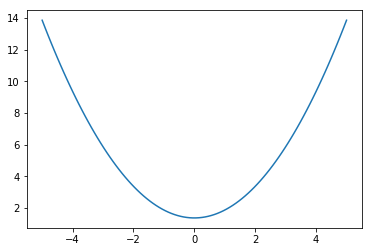

In [64]:
mu_vals = np.linspace(-5, 5, 100)
vals = [KL_p_q(mu_val) for mu_val in mu_vals]
pl.plot(mu_vals, vals)

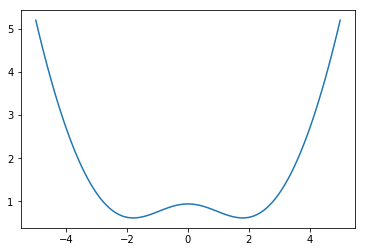

In [65]:
mu_vals = np.linspace(-5, 5, 100)
vals = [KL_q_p(mu_val) for mu_val in mu_vals]
pl.plot(mu_vals, vals)

In [45]:
f = p * sp.log(p/q)
f.simplify()

In [46]:
f = f.subs({mu: 200})
f.simplify()

In [33]:
f = p.subs(mu, 2)
f.simplify()

In [ ]:
f = sp.lambdify([x], f)
quad(f, -10, 10)[0]

In [41]:
f = x * mu
f

In [43]:
f.subs(mu, 1)

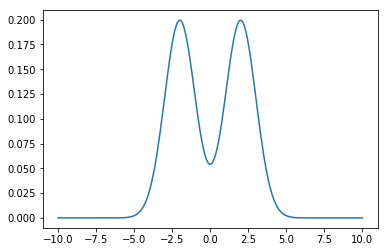

In [63]:
xxx = np.linspace(-10, 10,200)
pl.plot( xxx, [p.subs({x:v}) for v in xxx])